In [ ]:
## Data Preprocessing
In this section, I preprocess the dataset to prepare it for training. The steps taken include:
- **Dropping Columns:** I removed columns that were not relevant to the prediction task. For instance, certain categorical features were dropped based on exploratory data analysis.
- **Handling Missing Data:** Any missing values were addressed by filling them with the mean or median values, depending on the distribution of the data.
- **Encoding Categorical Variables:** Categorical features were transformed into numeric format using one-hot encoding to allow for effective training in the model.

In [ ]:
## Hyperparameters
For both the SGD and Momentum methods, I used the following hyperparameters:
- **Learning Rate:** 0.01
- **Batch Size:** 32
- **Number of Epochs:** 100
- **Regularization:** L2 regularization with a coefficient of 0.01

In [ ]:
## Mathematical Formulations
The following equations were utilized for calculating gradients and updating weights in linear regression:

**Gradient Calculation:**
\[
\text{Gradient} = \frac{1}{m} \sum_{i=1}^{m} (y_{pred}^{(i)} - y^{(i)}) x^{(i)}
\]

**Weight Update:**
\[
w = w - \alpha \cdot \text{Gradient}
\]
where \( \alpha \) is the learning rate.


In [4]:
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



In [5]:
train_path = '/Users/vi.rubio/eng-ai-agents/assignments/assignment-2/kaggle/train'
if os.path.exists(train_path):
    train_df = pd.read_csv(train_path, nrows=1000)  # Reads the first 1000 rows
    print(train_df.head())
else:
    print("File not found.")


                     id  click      hour    C1  banner_pos   site_id  \
0   1000009418151094273      0  14102100  1005           0  1fbe01fe   
1  10000169349117863715      0  14102100  1005           0  1fbe01fe   
2  10000371904215119486      0  14102100  1005           0  1fbe01fe   
3  10000640724480838376      0  14102100  1005           0  1fbe01fe   
4  10000679056417042096      0  14102100  1005           1  fe8cc448   

  site_domain site_category    app_id app_domain  ... device_type  \
0    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
1    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
2    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
3    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
4    9166c161      0569f928  ecad2386   7801e8d9  ...           1   

  device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  
0                2  15706  320   50  1722    0   35      -1   79  
1                0

In [10]:
train_path = '/Users/vi.rubio/eng-ai-agents/assignments/assignment-2/kaggle/train'
print(f"Does the path exist? {os.path.exists(train_path)}")
print(f"Is it a file? {os.path.isfile(train_path)}")
print(train_df.dtypes)

Does the path exist? True
Is it a file? True
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_domain         object
                     ...  
site_id_fd309fe8      bool
site_id_fe8cc448      bool
device_type_1         bool
device_type_4         bool
device_type_5         bool
Length: 145, dtype: object


In [7]:
# Example of dropping unnecessary columns
train_df.drop(columns=['id'], inplace=True)  # Drop id if not needed

# Handle missing values (if any)
train_df.fillna(0, inplace=True)  # Example: filling NaN with 0


In [16]:
print(train_df.columns)
train_df = pd.get_dummies(train_df, columns=['site_category'], drop_first=True)

#train_df = pd.get_dummies(train_df, columns=['site_id', 'device_type'], drop_first=True)

Index(['click', 'hour', 'C1', 'banner_pos', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip',
       ...
       'site_domain_e16ceb4b', 'site_domain_e2a5dc06', 'site_domain_e2e5d9f1',
       'site_domain_eddd1cf1', 'site_domain_f3845767', 'site_domain_f436b08f',
       'site_domain_f43e535b', 'site_domain_f7570339', 'site_domain_fa41b2d8',
       'site_domain_fcb30e54'],
      dtype='object', length=252)


In [19]:
object_cols = train_df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

Object columns: Index(['app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model'],
      dtype='object')


In [23]:
import pandas as pd
import torch

# Assuming train_df is already loaded

# Step 1: Check data types
print("Data types of columns before conversion:")
print(train_df.dtypes)

# Step 2: Convert boolean columns to integers
bool_columns = train_df.select_dtypes(include=['bool']).columns
train_df[bool_columns] = train_df[bool_columns].astype(int)  # Convert to int (1/0)

# Step 3: Fill NaNs with 0
train_df = train_df.fillna(0)

# Step 4: Confirm data types after conversion
print("Data types after boolean conversion:")
print(train_df.dtypes)

# Step 5: Convert DataFrame to PyTorch tensors
X = torch.tensor(train_df.drop(columns=['click']).values, dtype=torch.float32)
y = torch.tensor(train_df['click'].values, dtype=torch.float32).view(-1, 1)

# Check shapes to ensure tensors are created successfully
print("Shapes of X and y:", X.shape, y.shape)


Data types of columns before conversion:
click                     int64
hour                      int64
C1                        int64
banner_pos                int64
app_id                     int8
                          ...  
site_category_72722551     bool
site_category_75fa27f6     bool
site_category_76b2941d     bool
site_category_f028772b     bool
site_category_f66779e6     bool
Length: 260, dtype: object
Data types after boolean conversion:
click                     int64
hour                      int64
C1                        int64
banner_pos                int64
app_id                     int8
                          ...  
site_category_72722551    int64
site_category_75fa27f6    int64
site_category_76b2941d    int64
site_category_f028772b    int64
site_category_f66779e6    int64
Length: 260, dtype: object
Shapes of X and y: torch.Size([1000, 259]) torch.Size([1000, 1])


In [24]:
print(train_df.dtypes)

X = torch.tensor(train_df.drop(columns=['click']).values, dtype=torch.float32)
y = torch.tensor(train_df['click'].values, dtype=torch.float32).view(-1, 1)


click                     int64
hour                      int64
C1                        int64
banner_pos                int64
app_id                     int8
                          ...  
site_category_72722551    int64
site_category_75fa27f6    int64
site_category_76b2941d    int64
site_category_f028772b    int64
site_category_f66779e6    int64
Length: 260, dtype: object


In [25]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [26]:
model = LogisticRegressionModel(X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [27]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 16.0000
Epoch [20/100], Loss: 16.0000
Epoch [30/100], Loss: 16.0000
Epoch [40/100], Loss: 16.0000
Epoch [50/100], Loss: 16.0000
Epoch [60/100], Loss: 16.0000
Epoch [70/100], Loss: 16.0000
Epoch [80/100], Loss: 16.0000
Epoch [90/100], Loss: 16.0000
Epoch [100/100], Loss: 16.0000


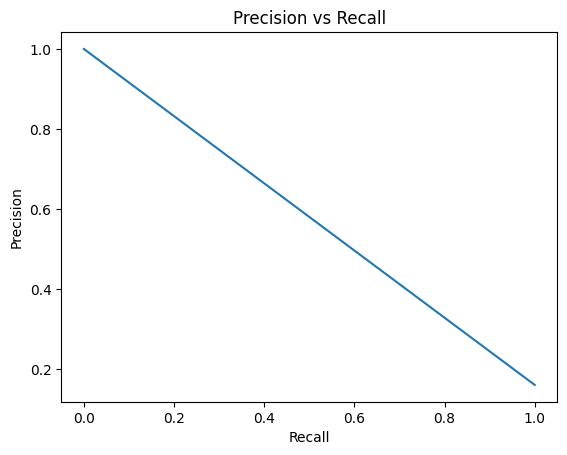

In [29]:
from sklearn.metrics import precision_recall_curve

y_scores = model(X).detach().numpy()
precision, recall, _ = precision_recall_curve(y.numpy(), y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

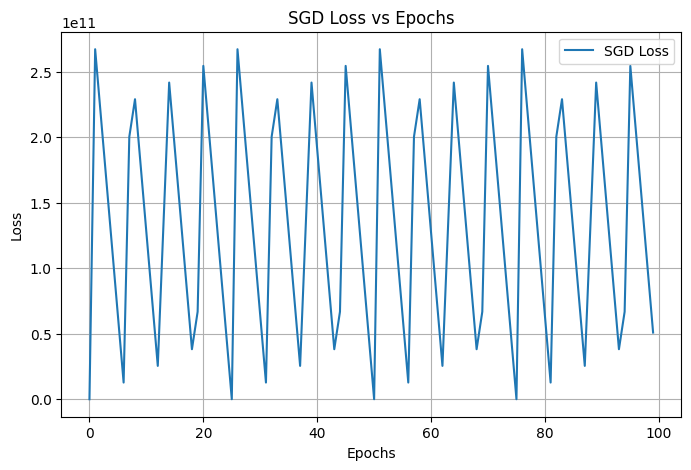

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define your logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer for logistic regression

    def forward(self, x):
        return self.linear(x)  # Output raw logits (no sigmoid here)

# Assuming X and y are your data tensors
input_size = X.shape[1]  # Number of features in your dataset
model = LogisticRegressionModel(input_size)  # Create an instance of your model

# Define hyperparameters
learning_rate = 0.01
num_epochs = 100  # Define how many epochs you want to train for

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# For storing losses
losses_sgd = []

# Define the loss computation function using BCEWithLogitsLoss
def compute_loss(model, X, y):
    outputs = model(X)  # Forward pass to get model outputs
    criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss
    loss = criterion(outputs, y.float())  # Ensure y is of type float for BCE loss
    return loss

# SGD Training Loop
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Compute loss
    loss = compute_loss(model, X, y)
    
    # Backpropagation
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Store the loss
    losses_sgd.append(loss.item())  # Append loss to the list

# Plot the losses
plt.figure(figsize=(8, 5))
plt.plot(losses_sgd, label='SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()


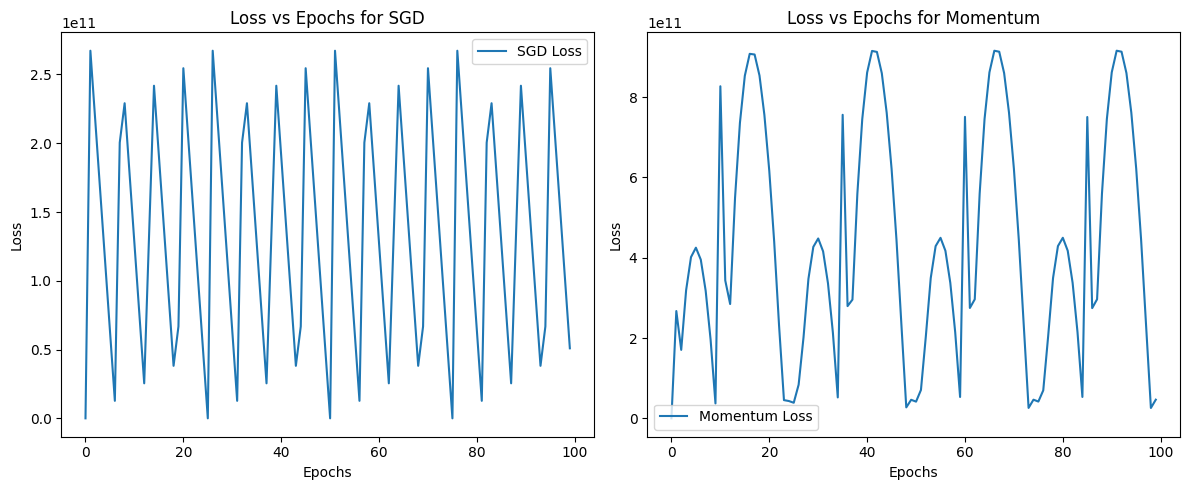

Shape of X: torch.Size([1000, 259])
Shape of y: torch.Size([1000, 1])


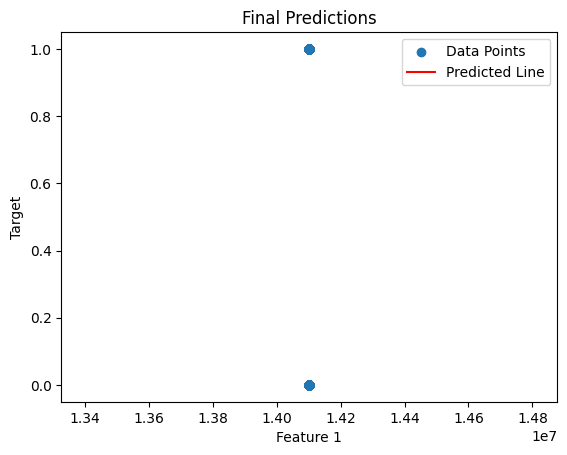

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define your logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer for logistic regression

    def forward(self, x):
        return self.linear(x)  # Output raw logits (no sigmoid here)

# Loss computation function
def compute_loss(model, X, y):
    outputs = model(X)  # Forward pass to get model outputs
    criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss
    loss = criterion(outputs, y.float())  # Ensure y is of type float for BCE loss
    return loss

# Initialize parameters
num_epochs = 100
learning_rate = 0.01
input_size = X.shape[1]  # Define input size based on your dataset

# Initialize your model
model = LogisticRegressionModel(input_size)  # Create an instance of your model
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=learning_rate)  # SGD optimizer
optimizer_momentum = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)  # Momentum optimizer

# For storing losses
losses_sgd = []
losses_momentum = []

# SGD Training Loop
for epoch in range(num_epochs):
    optimizer_sgd.zero_grad()  # Zero the gradients for SGD
    loss = compute_loss(model, X, y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer_sgd.step()  # Update weights
    losses_sgd.append(loss.item())  # Store loss

# Momentum Training Loop
for epoch in range(num_epochs):
    optimizer_momentum.zero_grad()  # Zero the gradients for Momentum
    loss = compute_loss(model, X, y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer_momentum.step()  # Update weights
    losses_momentum.append(loss.item())  # Store loss

# Plot the losses for both SGD and Momentum
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label='SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for SGD')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_momentum, label='Momentum Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Momentum')
plt.legend()

plt.tight_layout()
plt.show()

# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Choose the first feature from X for plotting
X_feature = X[:, 0].numpy()  # Selecting the first feature and converting to numpy
y_flat = y.numpy().squeeze()  # Flatten y to a 1D array

# Scatter plot of data points and final predictions
plt.scatter(X_feature, y_flat, label='Data Points')  # Use the selected feature for x-axis
plt.plot(X_feature, torch.sigmoid(model(X)).detach().numpy(), color='red', label='Predicted Line')  # Use sigmoid for predictions
plt.xlabel('Feature 1')  # Label the feature you are plotting
plt.ylabel('Target')
plt.title('Final Predictions')
plt.legend()
plt.show()




Number of SGD losses: 100
Number of Momentum losses: 100


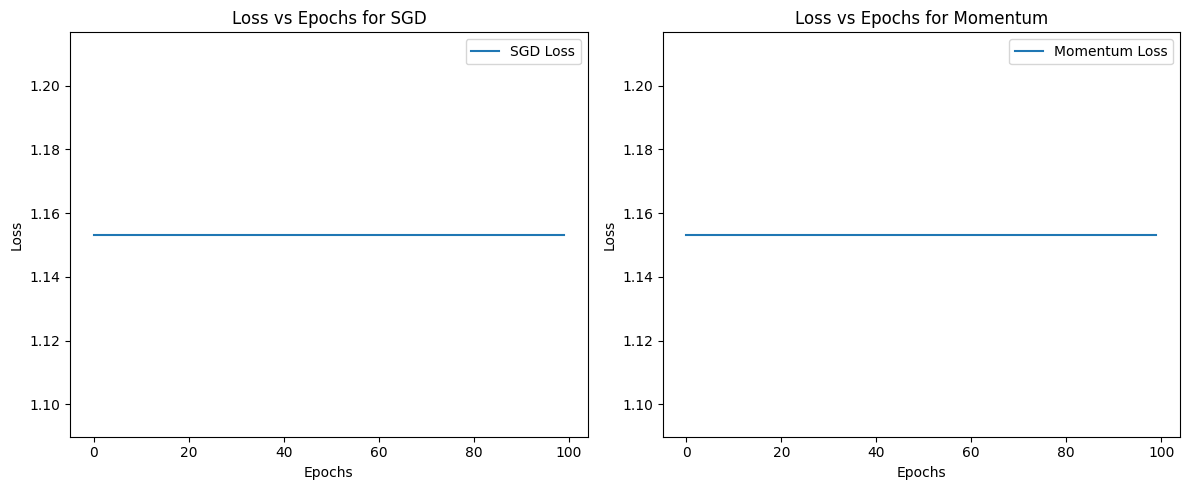

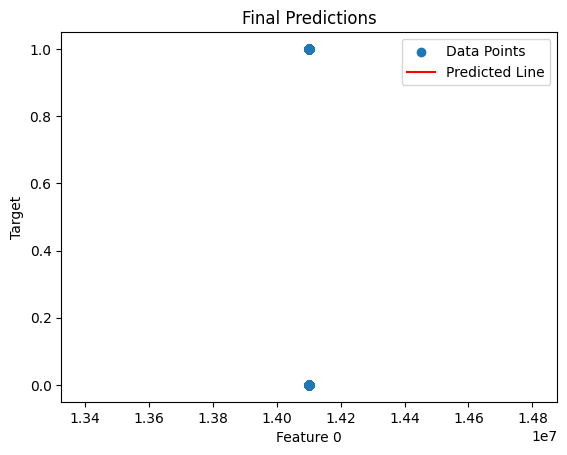

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define your logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize your model and optimizer
input_size = X.shape[1]  # Define input size based on your dataset
model = LogisticRegressionModel(input_size)
momentum_model = LogisticRegressionModel(input_size)  # For momentum
learning_rate = 0.01  # Learning rate
num_epochs = 100  # Number of epochs

# Initialize optimizers
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
momentum_optimizer = torch.optim.SGD(momentum_model.parameters(), lr=learning_rate, momentum=0.9)

# Initialize empty lists to store loss values
losses_sgd = []
losses_momentum = []

# Example for SGD Training Loop
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Compute loss
    loss = compute_loss(model, X, y)
    
    # Backpropagation
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Store the loss
    losses_sgd.append(loss.item())  # Append the loss value for SGD

# Example for Momentum Training Loop
for epoch in range(num_epochs):
    # Zero the gradients
    momentum_optimizer.zero_grad()
    
    # Compute loss
    loss = compute_loss(momentum_model, X, y)
    
    # Backpropagation
    loss.backward()
    
    # Update weights
    momentum_optimizer.step()
    
    # Store the loss
    losses_momentum.append(loss.item())  # Append the loss value for Momentum

print("Number of SGD losses:", len(losses_sgd))
print("Number of Momentum losses:", len(losses_momentum))

# After training loops
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label='SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for SGD')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_momentum, label='Momentum Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Momentum')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot of data points and final predictions
feature_index = 0  # Change this index to select a different feature from X
plt.scatter(X[:, feature_index].numpy(), y.numpy().squeeze(), label='Data Points')  # Flatten y if necessary
plt.plot(X[:, feature_index].numpy(), torch.sigmoid(model(X)).detach().numpy(), color='red', label='Predicted Line')  # Use sigmoid for predictions
plt.xlabel(f'Feature {feature_index}')
plt.ylabel('Target')
plt.title('Final Predictions')
plt.legend()
plt.show()
